In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.metrics import classification_report ,accuracy_score,confusion_matrix
import warnings
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
df=pd.read_csv('/content/IRIS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [98]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [99]:
label_encoder=LabelEncoder()
df['species']=label_encoder.fit_transform(df['species'])
print(df)


     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [100]:
df["species"].value_counts()

,count
species,
0,50
1,50
2,50


In [101]:
x=df.drop(columns=['species'],axis=1)
y=df['species']
print(x)
print(y)
# X :Features
# Y :Target
# df.head()

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [102]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)
# 25% of the data will be used for testing, and the remaining 75% for training.
# training -> 75% of data will be used for the training
# testing -> 25% evaluate the performance of the trained data

In [103]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
# print(X_train)
# print()
# print(X_test)

In [104]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print("Bayes Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Bayes Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [105]:
print("confusion matrix: \n", confusion_matrix(y_pred, y_test))
print("accuracy score: ", accuracy_score(y_pred, y_test))
print("classification report: ", classification_report(y_pred, y_test))




confusion matrix: 
 [[16  0  0]
 [ 0 10  0]
 [ 0  1 11]]
accuracy score:  0.9736842105263158
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



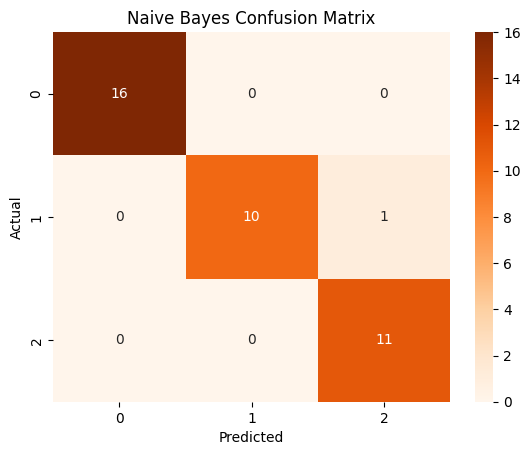

In [106]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Oranges")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [107]:
svc = SVC(kernel="rbf")
svc.fit(X_train_scaled, y_train)
y_pred2 = svc.predict(X_test_scaled)
print("SVC Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVC Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



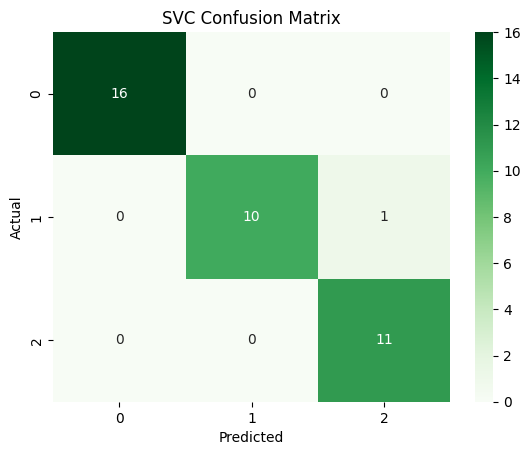

In [108]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt="d", cmap="Greens")
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [109]:

logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)
y_pred3 = logistic.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred3))
print("Classification Report:", classification_report(y_test,y_pred3))

Logistic Regression Accuracy: 0.9736842105263158
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

